##  BUILD A COMPLETE FUNCTIONAL MACHINE LEARNING MODEL :

## 0.Python Now is your friend : 
Why **Python** ? 
1.  it's Simple.
2. it provides built-in libraries that make it very easy to implement ML Algorithms.

Some of those libraries : 
1. **Pandas** : for exploring and manipulating our Data.
2. **Sickit-Learn** : for **Modeling** our Dataset


## 0`. Defining the problem :  
     What is the problem we are tackling ? 
- We are trying to build a model that makes prediction on house prices based on some of its caracteristics. 

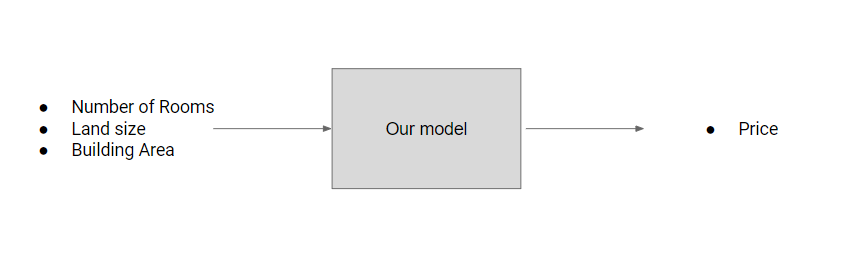

## 1-Data Collection : Collect our Data
  there are several ways to get our Data :

  - **Using public datasets :** that we can found them in some known websites :

    - [Kaggle Datasets](https://www.kaggle.com/datasets)
    - [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
    - [Amazon AWS datasets](https://registry.opendata.aws/)
    - [Google Datasets search](https://datasetsearch.research.google.com/)
    

      <br>
  - **Scraping data from websites** .
  - **Buy the data :** with the growth of the data, Many **third-party providers** start selling data.
  -  **Partnering with other organizations :** You can calloborate with universities, research institutions, or companies, where they provide for you the data.
  - **Collect your own data:**  by : 
    - conducting surveys.
    - running experiments.
    - using sensors to collect data in real-time.

In [1]:
import pandas as pd

# Load data in our working env
houses_file_path = 'DB/melb_data.csv'
houses_data = pd.read_csv(houses_file_path) # put our dataset in a pandas object that's called a "DataFrame".

# to ensure that our data is successfully loaded : 
houses_data.head() #print out the first five rows of our dataset 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 2-Data Preprocessing: Prepare the data to build our model

2.1 Basic Data exploration :

In [3]:
houses_data.shape #show the shape of our dataset

(13580, 21)

In [4]:
houses_data.info() #get some information about our dataset : type and the number of non-null values that each column contains.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

2.1 Data Cleaning : To prevent errors during the training phase.

In [5]:
# Filter rows with missing values.
houses_data = houses_data.dropna(axis=0) #drop rows with missing values from our dataset. 
houses_data.shape #to see the cleaned version of our data.

(6196, 21)

2.2 Prediction Target & Features Selection : 
<br>

**Features** are  all the columns that are inputted into our model, and latter used to make predictions.  
**Prediction target** is what we are expecting our model to predict. 

In [6]:
# Choose target and features, and put it into two separated variables.
y = houses_data.Price
houses_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = houses_data[houses_features]


2.3 Splitting our Data : to detect the problems that might occure in the training phase: OverFitting & Underfitting.

In [7]:
#Sickit-learn will help us in this part of process. 
from sklearn.model_selection import train_test_split

# split the original dataset into training set (used in the training phase ) and validation dataset (for testing our Model's predictions ),and that's for both features and target

train_X, val_X, train_y, val_y = train_test_split(X, #features
                                                   y, #target
                                                   random_state = 0 #to ensure that we get the same split every time we run this script. 
                                                   ) 




## 3- Fitting the Model :


3.1 Define our Model : it's based on the problem we are tackling 
- There are three major types of machine learning algorithms : Supervised, Unsupervised and reinforcement.

- Each type has a series of models that we can select from.

In [8]:
from sklearn.tree import DecisionTreeRegressor
# Define model 
Our_Model = DecisionTreeRegressor() # because it's a regression problem, it's under the supervised learning type. 

3.2 Fit our Model : 

In [9]:
# Fit model
Our_Model.fit(train_X, train_y) #here the model will try to learn patterns from data we are providing. 


DecisionTreeRegressor()

## 4-Evaluating the Model : Measure the quality of our model


4.1 Making Predictions : 

In [10]:

#Use the model by making predictions on new data. 
val_predictions = Our_Model.predict(val_X) #returns some predictions made by our Model.
print("this is the validation predictions : ", val_predictions)
print("this is the real target values for the validation dataset ", val_y.tolist()[:10])

this is the validation predictions :  [ 937500.  550000. 1015000. ...  240000. 1110000. 1303000.]
this is the real target values for the validation dataset  [815000.0, 655000.0, 957500.0, 1330000.0, 722000.0, 551000.0, 945000.0, 2400000.0, 1200000.0, 850000.0]


4.2 Summarizing Model's quality : 
- It's pointless to compare each single prediction with the actual value, we need an understandable metric => MAE

In [11]:

from sklearn.metrics import mean_absolute_error 
#We use MAE function from sickit-learn again. 
print("On Average, our model predictions are off by about %d $" % mean_absolute_error(val_predictions,val_y)) 
#returns the average of all differences between the actual values and the predictions.


On Average, our model predictions are off by about 266345 $


## 5-Improving the Model : 

5.1 Fine-Tune the model : adjuste some of its  parameters 

In [12]:
#after i ve done some experiments, i had noticed that this model has a parameter that if we set to 500 we get the minimum value of the error.
#Define the model with that specific parameter 
Improved_model = DecisionTreeRegressor(max_leaf_nodes= 500)  
#Fit it again
Improved_model.fit(train_X, train_y)
#Use it to make new predictions
Improved_Predicitions = Improved_model.predict(val_X)
#Re-evaluate the model. 
print("On Average, our improved predictions are now off by about %d $" % mean_absolute_error(Improved_Predicitions,val_y))


On Average, our improved predictions are now off by about 243978 $


The error is minimized, so we have  better predictions now => overall, we have better performance.

## Congrats!! you have built your first Machine Learning model !!  